# PHYSICS170N Final Project

Group members: Wenbo Hao, Haiping Zhang, Xiaolian Zheng, Yizhang Zhuo

This Jupyter Notebook is an implementation of Yee's Method on computing Maxwell's equations. We do three cases:
1. 1D Maxwell's equation in vacuum
2. 1D Maxwell's equation for wave entering a (linear and dispersive) medium from vacuum with zero incident angle and then leave
3. 2D Maxwell's equation in vacuum with a source current at the center


### Section 1: 1D Maxwell's equations in vacuum

First we finish task 1: 1D Maxwell's equation in vacuum\
\
Assume the wave is propagating in direction x, with electric field pointing in the z direction and magnetic field pointing in the -y direction.

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_y}{\partial x}$$

$$ \frac {\partial B_z}{\partial t} = \frac {\partial E_z}{\partial x}$$

The normalization we used: 
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, and $B_{true} = BE_0$.


The updating scheme:

$$E_z\left(n + \frac{1}{2}\right)_i = E_z\left(n - \frac{1}{2}\right)_i + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac{1}{2}} - B_y(n)_{i - \frac{1}{2}} \right)$$

$$B_z\left(n + 1\right)_{i + \frac {1}{2}} = B_y\left(n\right)_{i + \frac {1}{2}} + \frac{\delta t}{\delta x} \left( E_z(n + \frac {1}{2})_{i + 1} - E_z(n + \frac {1}{2})_{i} \right)$$

In [1]:
# Implementation of the Finite Difference Time Domain (Yee) method in 1D

import numpy as np

def advance_E_field(E : np.ndarray, B : np.ndarray, dx, dt):
    n = E.shape[0]
    for i in range(n):
        E[i] += dt / dx * (B[i] - B[i-1])

def advance_B_field(E : np.ndarray, B : np.ndarray, dx, dt):
    n = B.shape[0]
    for i in range(n-1):
        B[i] += dt / dx * (E[i+1] - E[i])
    B[n-1] += dt / dx * (E[0] - E[n-1])


def field_evolve_vacuum(E : np.ndarray, B : np.ndarray, dx, dt):
    """Compute evolution of electromagnetic field in vacuum in 1D using the
    FDTD method. All quantities are assumed to be dimensionless.

    Inputs:
    - E : Initial electric field at integer coordinates, t=-dt/2. Assume
      periodic boundary conditions.
    - B : Initial magnetic field at half-integer coordinates, t=0.
    - dx : Standard grid size of the fields.
    - dt : Time step of field evolution.

    Returns:
    - E : Numpy array containing electric field at the next time step.
    - B : Numpy array containing magnetic field at the next time step.
    """

    advance_E_field(E, B, dx, dt)
    advance_B_field(E, B, dx, dt)
    return E, B

In [2]:
import matplotlib.pyplot as plt

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma))

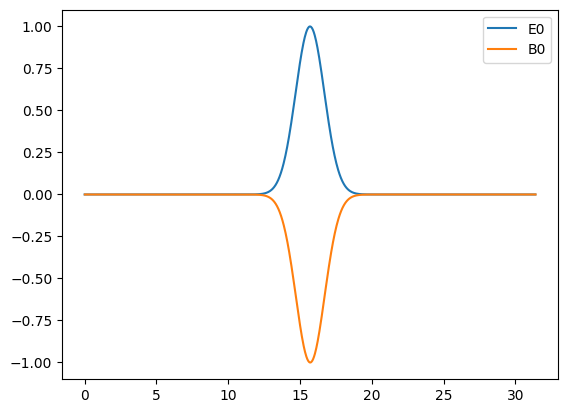

In [3]:
dt = 0.03
k = 1
omega = 1
L = 10 * np.pi
nx = 1000
dx = L / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
dt = 0.95*dx
# E_0 = np.sin(k*x + omega * dt / 2) # t = -dt / 2
# B_0 = np.sin(k*x)
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)

plt.plot(x, E_0, label='E0')
plt.plot(x1, B_0, label='B0')
plt.legend()
plt.show()

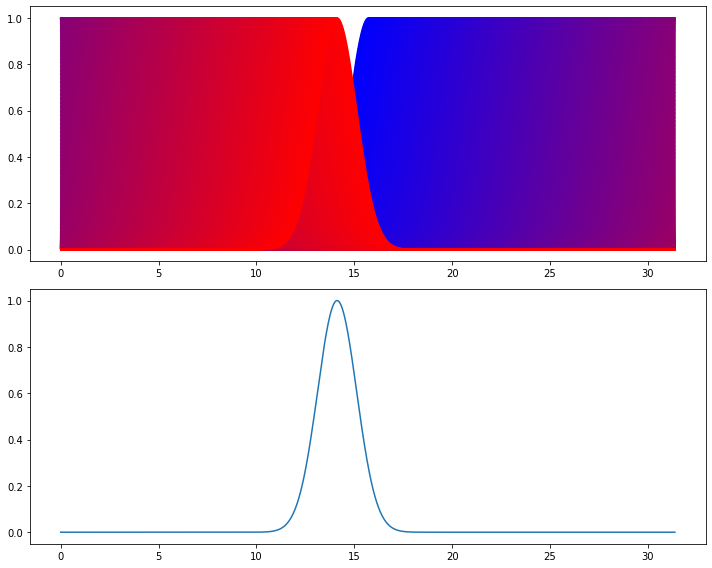

In [13]:
step = 1000
E_history = []
B_history = []
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

for i in range(step):
    E_0, B_0 = field_evolve_vacuum(E_0, B_0, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))

plt.subplot(2, 1, 2)
plt.plot(x,E_0)
plt.tight_layout()
plt.show()

### Section 2: 1D Maxwell's equations in medium

Then we finish task 2: 1D Maxwell's equation for wave entering a (linear and dispersive) medium from vacuum with zero incident angle and then leave

Assume the wave is propagating in direction x, with electric field pointing in the z direction and magnetic field pointing in the y direction.

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_y}{\partial x} - J$$

$$ \frac {\partial B_z}{\partial t} = \frac {\partial E_z}{\partial x}$$

$$ \frac {\partial J}{\partial t} = \omega_p^2 E - \nu J$$

The normalization we used: 
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, $B_{true} = BE_0$, $J_{true} = J\frac {\omega_0 E_0}{4 \pi}$, $\omega_{ptrue} = \omega_p\omega_0$, and $\nu_{true} = \nu\omega_0$


The updating scheme:

$$E_z\left(n + \frac{1}{2}\right)_i = E_z\left(n - \frac{1}{2}\right)_i + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac{1}{2}} - B_y(n)_{i - \frac{1}{2}}\right) - \delta tJ_z\left(n -\frac{1}{2}\right)$$

$$B_y\left(n + 1\right)_{i + \frac {1}{2}} = B_y\left(n\right)_{i + \frac {1}{2}} + \frac{\delta t}{\delta x} \left( E_z(n + \frac {1}{2})_{i + 1} - E_z(n + \frac {1}{2})_{i} \right)$$

$$J_z\left(n + \frac{1}{2}\right)_i = J_z\left(n - \frac{1}{2}\right)_{i +\frac {1}{2}} + \frac{\delta t}{\delta x} \left( \omega_p^2E_z\left(n - \frac{1}{2}\right)_i - \nu J_z\left(n - \frac {1}{2}\right)_{i} \right)$$

In [12]:
def advance_JE_medium(E : np.ndarray, B : np.ndarray, J: np.ndarray, Omega_p: np.ndarray,
                       nu: np.ndarray, dx, dt):
    n = E.shape[0]
    
    for i in range(n):
        temp=E[i]
        E[i] += dt / dx *(B[i] - B[i - 1]) - dt * J[i]
        J[i] += dt / dx *(Omega_p[i] ** 2 * temp - nu[i] * J[i])

def field_evolve_medium(E: np.ndarray, B: np.ndarray, J: np.ndarray, Omega_p: np.ndarray,
                        nu: np.ndarray, dx, dt):
    """Compute evolution of electromagnetic field in medium in 1D using the
    FDTD method. All quantities are assumed to be dimensionless.

    Inputs:
    - E : Initial electric field at integer coordinates, t=-dt/2. Assume
      periodic boundary conditions.
    - B : Initial magnetic field at half-integer coordinates, t=0.
    - J : Initial current at integer coordinates, t=0.
    - Omega_p : Numpy array specifying plasma frequency over the 1D grid.
    - nu : Numpy array specifying collisional constant over the 1D grid.
      Will work properly only if taken nonzero value at exactly the same
      grid points as Omega_p.
    - dx : Standard grid size of the fields.
    - dt : Time step of field evolution.

    Returns:
    - E : Numpy array containing electric field at the next time step.
    - B : Numpy array containing magnetic field at the next time step.
    - J : Numpy array containing current at the next time step.
    """

    advance_JE_medium(E, B, J, Omega_p, nu, dx, dt)
    advance_B_field(E, B, dx, dt)
    return E, B, J

#### 2.1 Reflection at $\omega_p>\omega_0, \nu=0$

In [5]:
# For starters, we define a Gaussian pulse with nonzero central frequency
def modulated_gaussian(x, a, x0, sigma, f):
    return np.cos(2*np.pi*f*x) * gaussian(x, a, x0, sigma)

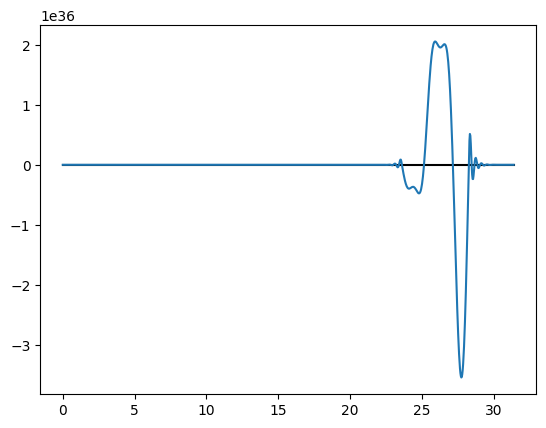

In [13]:
Omega_p = np.zeros_like(x)
start = int(nx * 0.75)
stop = int(nx * 0.9)
omega_p = 3
medium_range = slice(int(nx * 0.75), int(nx * 0.9))
Omega_p[start:stop] += omega_p
Omega_p[start] = omega_p / 2  # setup correct boundary condition for medium
Omega_p[stop] = omega_p / 2
nu = np.zeros_like(x)

step = 1000
E_history = []
B_history = []
E_0 = modulated_gaussian(x, 1, 5*np.pi - dt / 2, 1, 2)
B_0 = - modulated_gaussian(x1, 1, 5*np.pi, 1, 2)
J_0 = np.zeros_like(x)
plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0.copy())
    B_history.append(B_0.copy())
    # plot full history
    # plt.plot(x, E_0, c=(i/step,0,1-i/step))

# plot final state
plt.plot(x, E_0)

plt.show()

In this simulation, we choose $\omega_0=2$ and $\omega_p=3$. A movie (movie_2.mp4) is attached in the submission folder. At this plasma frequency, we clearly see that the pulse is completely reflected by the medium.

#### 2.2 Refraction at $\omega_p\approx\omega_0, \nu=0$

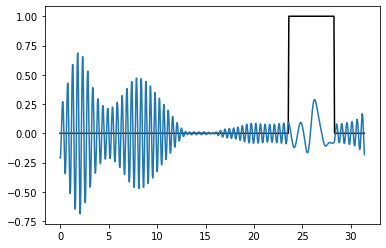

In [17]:
omega_p = 2
Omega_p = np.zeros_like(x)
Omega_p[start:stop] += omega_p
Omega_p[start] = omega_p / 2  # setup correct boundary condition for medium
Omega_p[stop] = omega_p / 2

step = 1000
E_history = []
B_history = []
E_0 = modulated_gaussian(x, 1, 5*np.pi - dt / 2, 1, 2)
B_0 = - modulated_gaussian(x1, 1, 5*np.pi, 1, 2)
J_0 = np.zeros_like(x)
plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0.copy())
    B_history.append(B_0.copy())
    # plot full history
    # plt.plot(x, E_0, c=(i/step,0,1-i/step))

# plot final state
plt.plot(x, E_0)

plt.show()

#### 2.3 Damping at $\omega_p\approx\omega_0, \nu=0.1\omega_0$

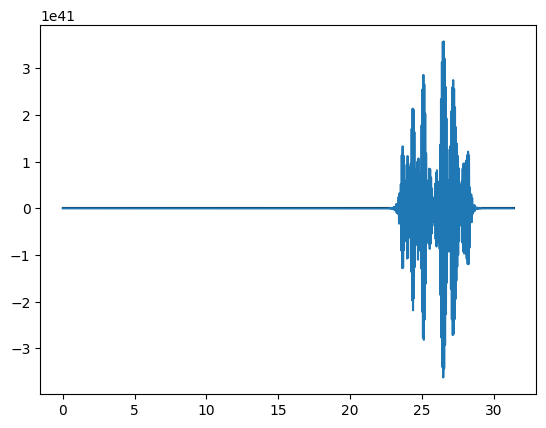

In [14]:
nu[start:stop] += 0.1 * omega_p
nu[start] = 0.05 * omega_p
nu[stop] = 0.05 * omega_p

step = 1000
E_history = []
B_history = []
E_0 = modulated_gaussian(x, 1, 5*np.pi - dt / 2, 1, 2)
B_0 = - modulated_gaussian(x1, 1, 5*np.pi, 1, 2)
J_0 = np.zeros_like(x)
plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0.copy())
    B_history.append(B_0.copy())
    # plot full history
    # plt.plot(x, E_0, c=(i/step,0,1-i/step))

# plot final state
plt.plot(x, E_0)

plt.show()

### Section 3: 2D Maxwell's equations with point current source

We then finish task 3: 2D Maxwell's equation in vacuum with a source current at the center\
\
Assume the wave is propagating in direction x and y with electric field pointing in z direction and magnetic field pointing in both the -x and the -y direction, with initial value zero. There is a source external current J_z at the center of the x-y plane along the z-axis. $J_z = f(\frac {t}{\tau})\sin(\omega_0t)$, $f(t)=\sin^2(\pi t)$ if 0<t<1 and 0 otherwise. $\omega_0 = 1, \tau =\frac {8\pi}{\omega_0}$

The equation we intend to solve:
$$ \frac {\partial E_z}{\partial t} = \frac {\partial B_y}{\partial x} - \frac {\partial B_x}{\partial y} - J_z$$

$$ \frac {\partial B_x}{\partial t} = -\frac {\partial E_z}{\partial y}$$

$$ \frac {\partial B_y}{\partial t} =  \frac {\partial E_z}{\partial x}$$

$$ J_z(x, y) = f(\frac {t}{\tau})\sin(\omega_0t) \ \text{if} \ (x, y) = (\frac {L_x}{2}, \frac {L_y}{2}) \ \text{and} \ 0 \ \text{otherwise} $$

The normalization we used (assume this normalization in both the x, y, and z direction): 
$x_{true} = x\frac {c}{\omega_0}$, $t_{true} = \frac {t}{\omega_0}$, $v_{true} = vc$, $E_{true} = EE_0$, and $B_{true} = BE_0$.


The updating scheme:

$$B_x\left(n + 1\right)_{i, j + \frac {1}{2}} = B_x\left(n\right)_{i,j+\frac {1}{2}} - \frac{\delta t}{\delta y} [ E_z(n + \frac {1}{2})_{i, j + 1} - E_z(n = \frac {1}{2})_{i, j}]$$

$$B_y\left(n + 1\right)_{i + \frac {1}{2}, j} = B_y\left(n\right)_{i + \frac {1}{2}, j} + \frac{\delta t}{\delta x} [ E_z(n + \frac {1}{2})_{i + 1, j} - E_z(n + \frac {1}{2})_{i, j} ]$$

$$E_z\left(n + \frac {1}{2}\right)_{i, j} = E_z\left(n - \frac {1}{2}\right)_{i, j} + \frac{\delta t}{\delta x} \left( B_y(n)_{i + \frac {1}{2}, j} - B_y(n )_{i - \frac {1}{2}, j} \right) - \frac{\delta t}{\delta y}\left(B_x(n)_{i, j + \frac {1}{2}} - B_x(n)_{i, j - \frac {1}{2}} \right) - J_z(n -\frac {1}{2})$$

$$J_z(n + \frac {1}{2})_{i, j} = f(\frac {(n + \frac {1}{2})dt}{\tau})\sin(\omega_0(n + \frac {1}{2})dt) \ \text{when} \ (i, j) = (\frac {n_x}{2}, \frac {n_y}{2}) \ \text{and} \ 0 \ \text{otherwise} $$

In [18]:
import numpy as np

def advance_Ez(Ez, Bx, By, Jz, dx, dy, dt, step):
    nx, ny = Ez.shape
    for i in range(nx):
        for j in range(ny):
            # Store B-field at useful positions, use %nx and %ny to include the periodic boundary condition
            Bx_right = Bx[i, j]
            Bx_left = Bx[i, j - 1]
            By_top = By[i, j]
            By_bottom = By[i - 1, j]

            # Update E-field
            Ez[i, j] += dt * ((By_top - By_bottom) / dx - (Bx_right - Bx_left) / dy
                              - Jz(i, j, omega0, nx, ny, step, dt))
            #print(Jz(i, j, step, dt))

def advance_Bx(Bx, Ez, dy, dt):
    nx, ny = Bx.shape
    for i in range(nx):
        for j in range(ny):
            Ez_top = Ez[i, (j+1) % ny]
            Ez_bottom = Ez[i, j]
            Bx[i, j] -= dt * (Ez_top - Ez_bottom) / dy

def advance_By(By, Ez, dx, dt):
    nx, ny = By.shape
    for i in range(nx):
        for j in range(ny):
            Ez_right = Ez[(i+1) % nx, j]
            Ez_left = Ez[i, j]
            By[i, j] += dt * (Ez_right - Ez_left) / dx

def field_evolve_2D(Ez, Bx, By, Jz, dx, dy, dt, steps):
    Ez_history = [np.copy(Ez)]
    Bx_history = [np.copy(Bx)]
    By_history = [np.copy(By)]

    for step in range(steps):
        advance_Ez(Ez, Bx, By, Jz, dx, dy, dt, step)
        advance_Bx(Bx, Ez, dy, dt)
        advance_By(By, Ez, dx, dt)

        Ez_history.append(np.copy(Ez))
        Bx_history.append(np.copy(Bx))
        By_history.append(np.copy(By))

    return Ez_history, Bx_history, By_history

# Define source current function
# def Jz_func(i, j, omega0, nx, ny, int_t, dt, duration):
#     s=0
#     if (i,j) == (nx//2, ny//2) and s < duration:
#       t = int_t*dt
#       return np.sin(t)**2 * np.cos(omega0*t)
def Jz_func(i, j, omega0, tau, nx, ny, int_t, dt):
    if (i,j) == (nx//2, ny//2):
        t = int_t*dt
        if t < 1:
            return np.sin(np.pi* (t/tau) ** 2) ** 2 * np.sin(omega0*t)
        else:
            return 0

In [19]:
from mpl_toolkits.mplot3d import Axes3D

#Initial condition for E and B. E are defined on time t = -dt/2 and on integer spatial grids.
#B are defined on time t = 0 and on half-integer spatial grids
#All initial values for E and B are zero
omega = 1
Lx = 10 * np.pi
nx = 100
dx = Lx / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
omega0 = 1
tau=8*np.pi/omega0
Ly = 10 * np.pi
ny = 100
dy = Ly / ny
y = np.arange(ny) * dy
y1 = y + dy / 2
dt = 0.5/(1/dx**2 + 1/dy**2)**0.5 #Stability condition: dt <= 1/(1/dx**2 + 1/dy**2) * 1/c
steps = 500

E0z = np.zeros((nx, ny))
B0x = np.zeros((nx, ny))
B0y = np.zeros((nx, ny))
Ez_history, Bx_history, By_history = field_evolve_2D(E0z, B0x, B0y, Jz_func, dx, dy, dt, steps)

# Create x, y coordinates for the grid
X, Y = np.meshgrid(x, y)

# Plot for Ez
# fig_ez = plt.figure(figsize=(10, 7))
# ax_ez = fig_ez.add_subplot(111, projection='3d')

# # Create a surface plot for Ez
# surf_ez = ax_ez.plot_surface(X, Y, Ez_history[-1], cmap='viridis', edgecolor='none')
# ax_ez.set_xlabel('X Axis')
# ax_ez.set_ylabel('Y Axis')
# ax_ez.set_zlabel('Ez')
# ax_ez.set_title('3D Plot of Electric Field Ez')

# # Add a color bar for Ez
# fig_ez.colorbar(surf_ez)

fig_ez, ax_ez = plt.subplots()
cont_ez = ax_ez.contourf(X, Y, Ez_history[-1], cmap='viridis')
fig_ez.colorbar(cont_ez)

# Show the plot for Ez
plt.show()

# Plot for Bx
fig_bx = plt.figure(figsize=(10, 7))
ax_bx = fig_bx.add_subplot(111, projection='3d')

# Create a surface plot for Bx
surf_bx = ax_bx.plot_surface(X, Y, Bx_history[-1], cmap='viridis', edgecolor='none')
ax_bx.set_xlabel('X Axis')
ax_bx.set_ylabel('Y Axis')
ax_bx.set_zlabel('Bx')
ax_bx.set_title('3D Plot of Magnetic Field Bx')

# Add a color bar for Bx
fig_bx.colorbar(surf_bx)

# Show the plot for Bx
plt.show()

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

vary timestep $dt=\frac{0.5}{\omega_0}$

In [ ]:
dt=0.5/omega0
nx = 200
dx = Lx / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
omega0 = 1
tau=8*np.pi/omega0
Ly = 10 * np.pi
ny = nx
dy = Ly / ny
y = np.arange(ny) * dy
y1 = y + dy / 2
steps = 500

E0z = np.zeros((nx, ny))
B0x = np.zeros((nx, ny))
B0y = np.zeros((nx, ny))
Ez_history, Bx_history, By_history = field_evolve_2D(E0z, B0x, B0y, Jz_func, dx, dy, dt, steps)


X, Y = np.meshgrid(x, y)
fig_ez, ax_ez = plt.subplots()
cont_ez = ax_ez.contourf(X, Y, Ez_history[-1], cmap='viridis')
fig_ez.colorbar(cont_ez)
plt.show()

fig_bx = plt.figure(figsize=(10, 7))
ax_bx = fig_bx.add_subplot(111, projection='3d')

surf_bx = ax_bx.plot_surface(X, Y, Bx_history[-1], cmap='viridis', edgecolor='none')
ax_bx.set_xlabel('X Axis')
ax_bx.set_ylabel('Y Axis')
ax_bx.set_zlabel('Bx')
ax_bx.set_title('3D Plot of Magnetic Field Bx')
fig_bx.colorbar(surf_bx)

plt.show()

vary timestep $dt=\frac{0.1}{\omega_0}$

In [ ]:
dt=0.1/omega0
nx = 1000
dx = Lx / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
omega0 = 1
tau=8*np.pi/omega0
Ly = 10 * np.pi
ny = nx
dy = Ly / ny
y = np.arange(ny) * dy
y1 = y + dy / 2
steps = 500

E0z = np.zeros((nx, ny))
B0x = np.zeros((nx, ny))
B0y = np.zeros((nx, ny))
Ez_history, Bx_history, By_history = field_evolve_2D(E0z, B0x, B0y, Jz_func, dx, dy, dt, steps)


X, Y = np.meshgrid(x, y)
fig_ez, ax_ez = plt.subplots()
cont_ez = ax_ez.contourf(X, Y, Ez_history[-1], cmap='viridis')
fig_ez.colorbar(cont_ez)
plt.show()

fig_bx = plt.figure(figsize=(10, 7))
ax_bx = fig_bx.add_subplot(111, projection='3d')

surf_bx = ax_bx.plot_surface(X, Y, Bx_history[-1], cmap='viridis', edgecolor='none')
ax_bx.set_xlabel('X Axis')
ax_bx.set_ylabel('Y Axis')
ax_bx.set_zlabel('Bx')
ax_bx.set_title('3D Plot of Magnetic Field Bx')
fig_bx.colorbar(surf_bx)

plt.show()

vary timestep $dt=\frac{0.02}{\omega_0}$

In [ ]:
dt=0.02/omega0
nx = 5000
dx = Lx / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
omega0 = 1
tau=8*np.pi/omega0
Ly = 10 * np.pi
ny = nx
dy = Ly / ny
y = np.arange(ny) * dy
y1 = y + dy / 2
steps = 500

E0z = np.zeros((nx, ny))
B0x = np.zeros((nx, ny))
B0y = np.zeros((nx, ny))
Ez_history, Bx_history, By_history = field_evolve_2D(E0z, B0x, B0y, Jz_func, dx, dy, dt, steps)


X, Y = np.meshgrid(x, y)
fig_ez, ax_ez = plt.subplots()
cont_ez = ax_ez.contourf(X, Y, Ez_history[-1], cmap='viridis')
fig_ez.colorbar(cont_ez)
plt.show()

fig_bx = plt.figure(figsize=(10, 7))
ax_bx = fig_bx.add_subplot(111, projection='3d')

surf_bx = ax_bx.plot_surface(X, Y, Bx_history[-1], cmap='viridis', edgecolor='none')
ax_bx.set_xlabel('X Axis')
ax_bx.set_ylabel('Y Axis')
ax_bx.set_zlabel('Bx')
ax_bx.set_title('3D Plot of Magnetic Field Bx')
fig_bx.colorbar(surf_bx)

plt.show()